In [2]:
%cd /data/soyeonhong/nlq/nlq_lightning
%load_ext autoreload
%autoreload 2

/data/soyeonhong/nlq/nlq_lightning


In [13]:
from pathlib import Path
import json
import torch
p_llava = Path('/data/soyeonhong/nlq/nlq_lightning/universal-ner/LLaVA-NeXT-Video-7B-DPO-uniner-extracted/version-1')

max_obj_in_caption = -1
max_caption_length = -1
caption_length = []
obj_in_caption = []
for p in p_llava.glob('**/*.json'):
    env_datas = json.loads(p.read_text())
    
    if len(env_datas) > max_caption_length:
        max_caption_length = len(env_datas)
    caption_length.append(len(env_datas))
    
    for env_data in env_datas:
        if len(env_data['entities']['values']) > max_obj_in_caption:
            max_obj_in_caption = len(env_data['entities']['values'])
            obj_in_caption.append(len(env_data['entities']['values']))
            
print(max_obj_in_caption, max_caption_length)

49 600


In [2]:
import numpy as np
np.mean(caption_length), np.std(caption_length), np.bincount(caption_length).argmax(), np.mean(obj_in_caption), np.std(obj_in_caption), np.bincount(obj_in_caption).argmax()

(243.1973840665874,
 79.47102340060066,
 240,
 30.142857142857142,
 9.738415409802437,
 15)

(array([3., 3., 4., 2., 2.]),
 array([15. , 21.8, 28.6, 35.4, 42.2, 49. ]),
 <BarContainer object of 5 artists>)

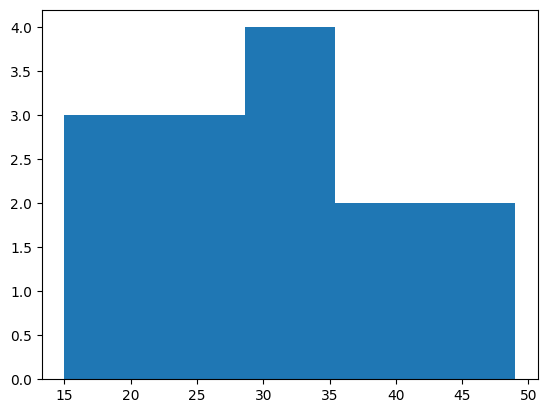

In [5]:
# plot obj_in_caption by using histogram
import matplotlib.pyplot as plt
plt.hist(obj_in_caption, bins='auto')

In [8]:
np.bincount(caption_length)

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    1,
          0,    1,    0,    3,    0,    0,    0,    0,    0,    0,    0,
          0,    3,    0,    1,    0,    0,    0,    0,    1,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          1,    0,    0,    0,    1,    0,    0,    0,    0,    0,    1,
          0,    0,    0,    0,    5,    1,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    1,    0,    0,    0,    0,    1,    1,
          3,    0,    1,    2,    1,    1,    1,    0,    2,    1,    4,
          0,    1,    0,    2,    2,    4,    0,    2,    1,    1,    0,
          1,    1,    1,    1,    1,    1,    1,    1,    3,    0,    1,
          0,    0,    0,    0,    2,    1,    1,   

In [2]:
p_llava = Path('/data/soyeonhong/nlq/nlq_lightning/universal-ner/LLaVA-NeXT-Video-7B-DPO-uniner-extracted/version-1')

max_obj_in_caption = -1
max_caption_length = -1
caption_length = []
obj_in_caption = []
for p in p_llava.glob('**/*.json'):
    env_datas = json.loads(p.read_text())
    
    obj_list = []
    for env_data in env_datas:
        obj_list.append(env_data['entities']['values'])
        
    if len(obj_list) < 240:
        obj_list.extend([['']] * (240 - len(obj_list)))
    elif len(obj_list) > 240:
        sample_idx = torch.linspace(0, len(obj_list)-1, 240).long()
        obj_list = [obj_list[i] for i in sample_idx]
        

    if len(obj_list) != 240:
        print(len(obj_list))
    
    
    
    

/data/soyeonhong/anaconda3/envs/groundvqa/lib/python3.9/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [20]:
import numpy as np

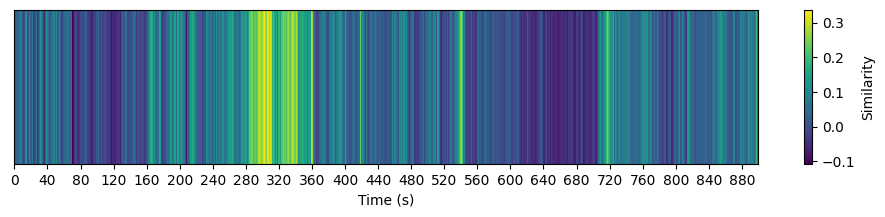

In [31]:
import torch.nn.functional as F

sim = F.cosine_similarity(q_feat, data_egovlp, dim=1)
# plot sim using heatmap

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 2))
plt.imshow(sim.detach().numpy().reshape(1,-1), aspect='auto', cmap='viridis')
plt.colorbar(label='Similarity')
# plt.title(f'Query: {query}\nTime: {t_s:.2f} ~ {t_e:.2f}', fontsize=9)

plt.xticks(np.arange(0, sim.shape[0], 40))
plt.yticks([])  # Remove y-axis ticks for a cleaner look
plt.xlabel('Time (s)')
plt.show()

In [25]:
sim.shape

torch.Size([900])